In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [ ]:
#Reading CSV file
df = pd.read_csv('/content/drive/MyDrive/Data Analyst Projects/train.csv')

**Checking various attributes of the data**

In [ ]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
df.shape

(243787, 21)

In [ ]:
df.columns.values

array(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth',
       'GenrePreference', 'UserRating', 'SupportTicketsPerMonth',
       'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled',
       'CustomerID', 'Churn'], dtype=object)

In [ ]:
df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [ ]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


**Observation**

*   Average monthly charges are Rs 12/- but 50% of the customers pay more than Rs 12/-
*   Average total charges are Rs 750/- and 25% of customers more than Rs 750/-



In [ ]:
df['Churn'].value_counts()

0    199605
1     44182
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts()/len(df)*100

0    81.876802
1    18.123198
Name: Churn, dtype: float64

Text(0.5, 1.02, 'Count of Target variable per category')

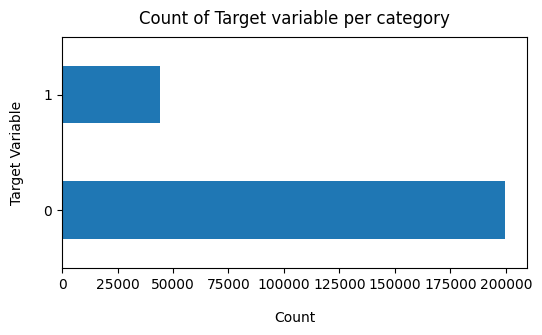

In [ ]:
df['Churn'].value_counts().plot(kind = 'barh', figsize = (6,3))
plt.xlabel('Count', labelpad = 14)
plt.ylabel('Target Variable', labelpad = 14)
plt.title('Count of Target variable per category', y = 1.02)

Data is highly imbalanced the ratio is 82:18

In [ ]:
# Concise Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

We don't have any missing values

**Data Cleaning**

In [ ]:
#Create a copy of base data for manupulation and processing
new_df = df.copy()

In [ ]:
new_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [ ]:
#Creating AccountAge Bins
new_df['AccountAge'].max()

119

In [ ]:
labels = ['{0}-{1}'.format(i, i + 11) for i in range(1, 120, 12)]

print(labels)

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84', '85-96', '97-108', '109-120']


In [ ]:
#Group the AccountAge in bins of 12 months

labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84', '85-96', '97-108', '109-120','121-132']
bins = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]

#Remove the last labels
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84', '85-96', '97-108', '109-120']

new_df['AccountAge_bins'] = pd.cut(new_df.AccountAge, bins, labels = labels, include_lowest = True)

In [ ]:
new_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,AccountAge_bins
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0,13-24
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0,49-60
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0,73-84
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0,25-36
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0,49-60


In [ ]:
#Check the count of AccountAge bins
new_df['AccountAge_bins'].value_counts().sort_values(ascending = False)

85-96      24978
25-36      24773
13-24      24657
73-84      24648
49-60      24579
61-72      24543
37-48      24504
97-108     24482
0-12       24129
109-120    22494
Name: AccountAge_bins, dtype: int64

In [ ]:
#Removing the columns not required for the further processing
new_df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

**Data Exploration**

#Initially we start with Univariate Analysis

In [ ]:
new_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,0,13-24
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,0,49-60
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0,73-84
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,0,25-36
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,0,49-60


In [ ]:
new_df.Churn.value_counts()

0    199605
1     44182
Name: Churn, dtype: int64

In [ ]:
new_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,0,13-24
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,0,49-60
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0,73-84
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,0,25-36
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,0,49-60


In [ ]:
new_df1 = df[['SubscriptionType','PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'Churn',]]

In [ ]:
new_df1.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,Churn
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,No,No,0
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,No,Yes,0
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,Yes,Yes,0
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,Yes,0
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,No,No,0


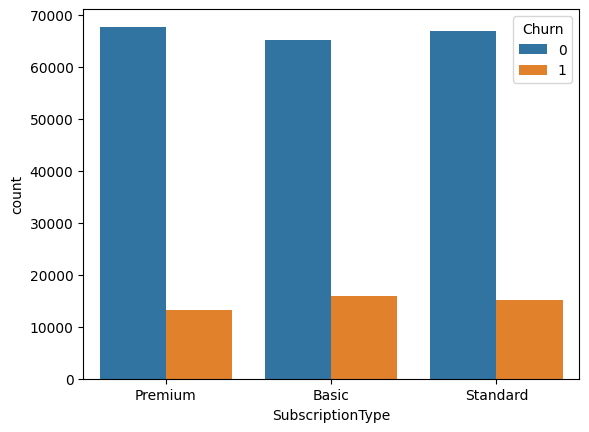

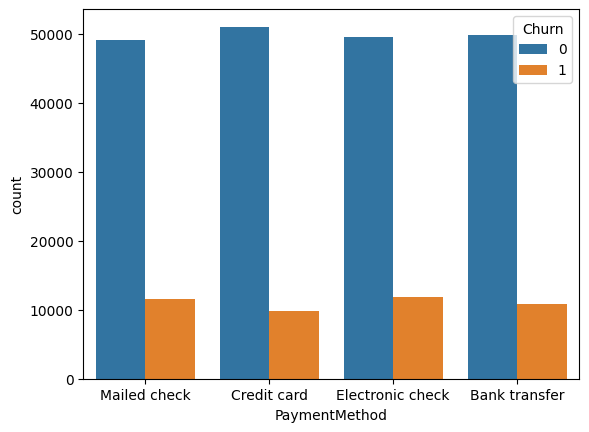

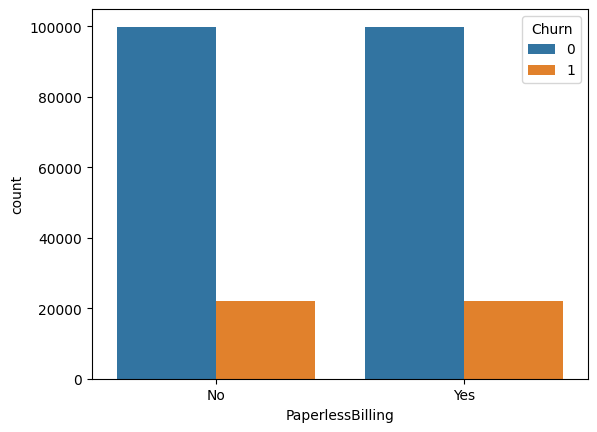

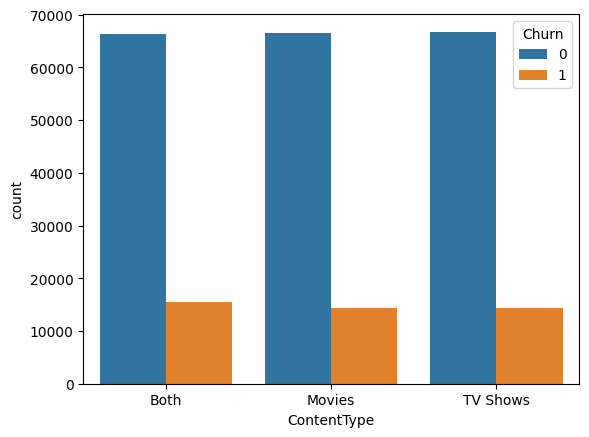

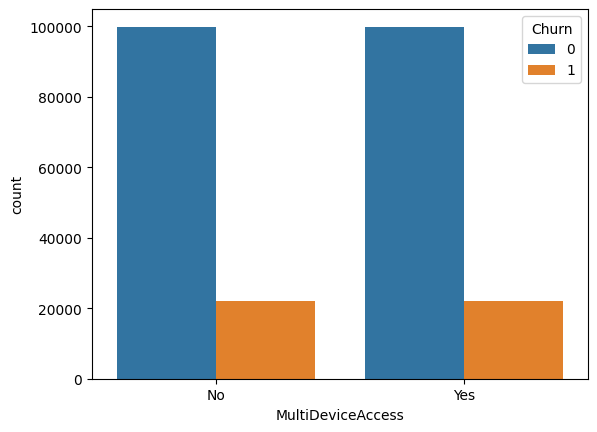

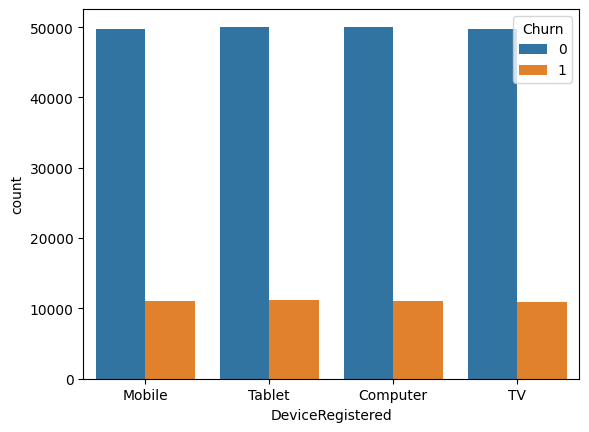

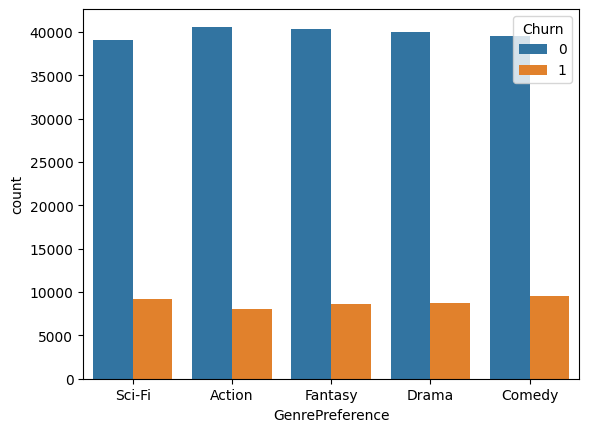

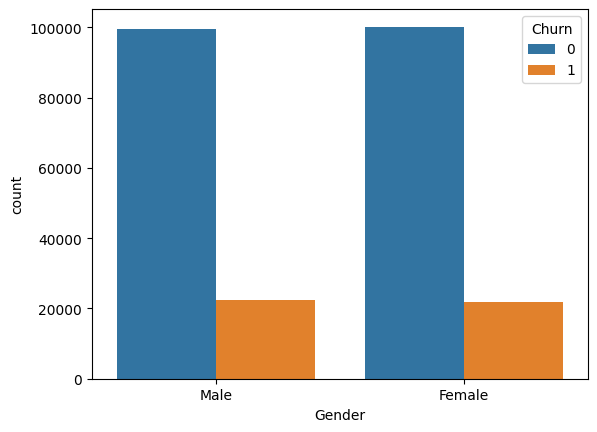

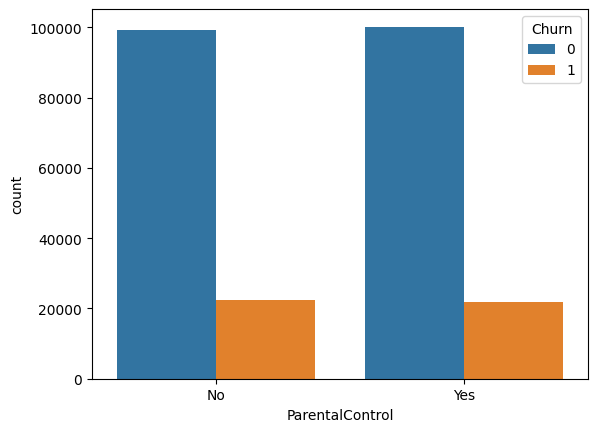

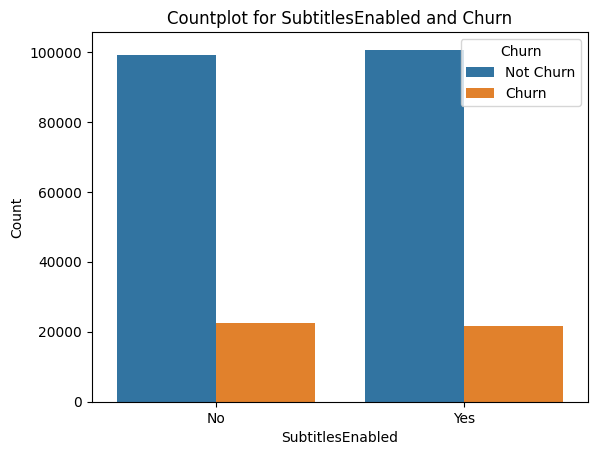

In [ ]:
import matplotlib.pyplot as plt
for i, predictor in enumerate(new_df1.drop(columns = ['Churn'])):
   plt.figure()
   sns.countplot(data = new_df1, x=predictor, hue ='Churn')

#Add Labels
plt.title(f'Countplot for {predictor} and Churn')
plt.xlabel(predictor)
plt.ylabel('Count')

#Add Legend
plt.legend(title='Churn', loc='upper right', labels = ['Not Churn', 'Churn'])

plt.show()

Univariate Analysis is not giving any insgights

In [ ]:
cat_df = new_df1

In [ ]:
cat_df.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,Churn
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,No,No,0
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,No,Yes,0
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,Yes,Yes,0
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,Yes,0
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,No,No,0


In [ ]:
new_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,0,13-24
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,0,49-60
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0,73-84
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,0,25-36
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,0,49-60


In [ ]:
cat_df1 = new_df[['SubscriptionType','PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'Churn','AccountAge_bins']]

In [ ]:
cat_df1.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,No,No,0,13-24
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,No,Yes,0,49-60
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,Yes,Yes,0,73-84
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,Yes,0,25-36
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,No,No,0,49-60


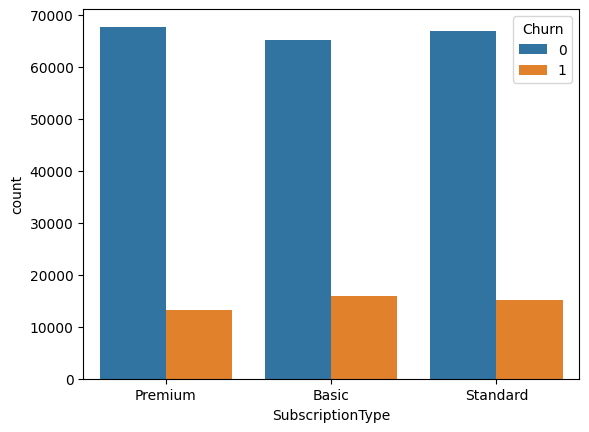

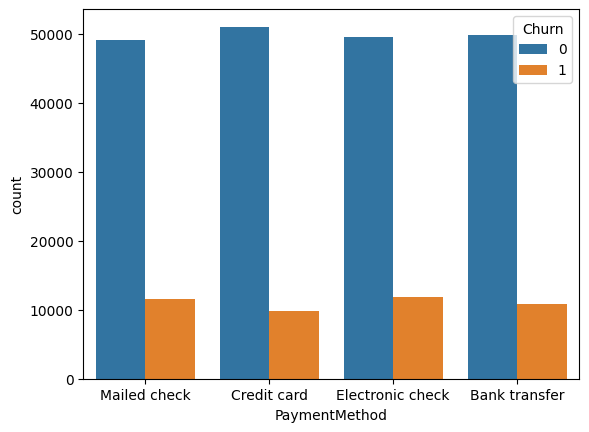

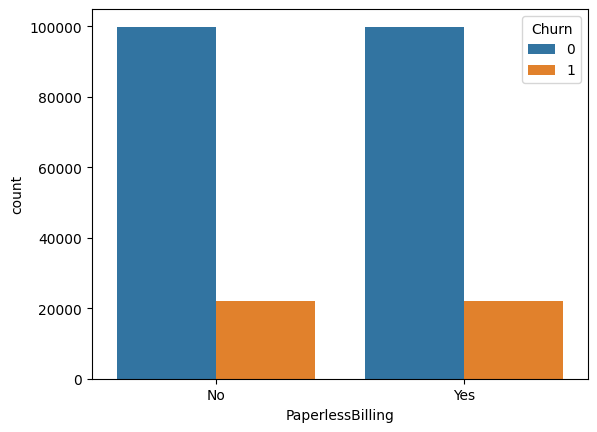

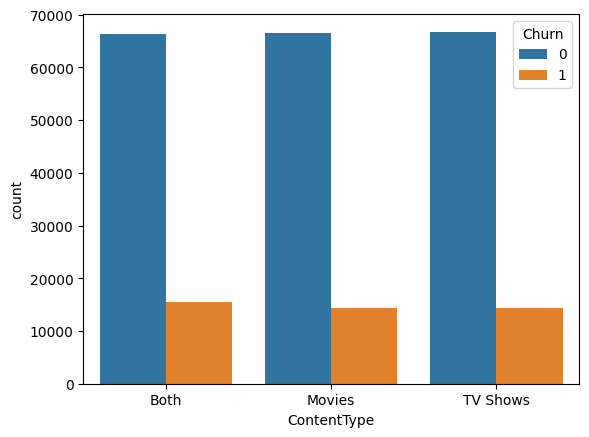

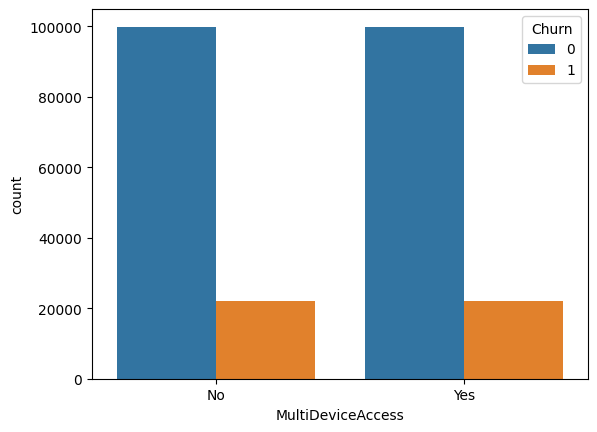

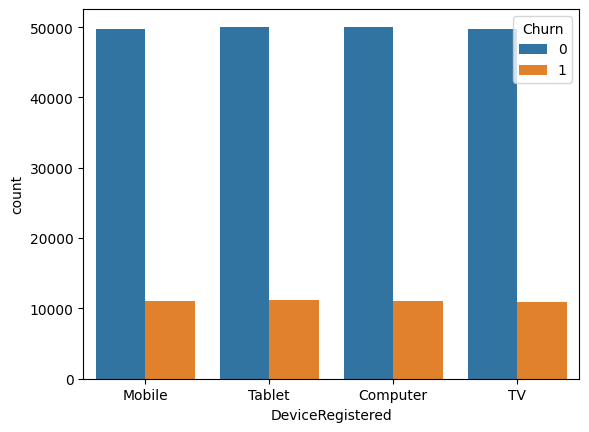

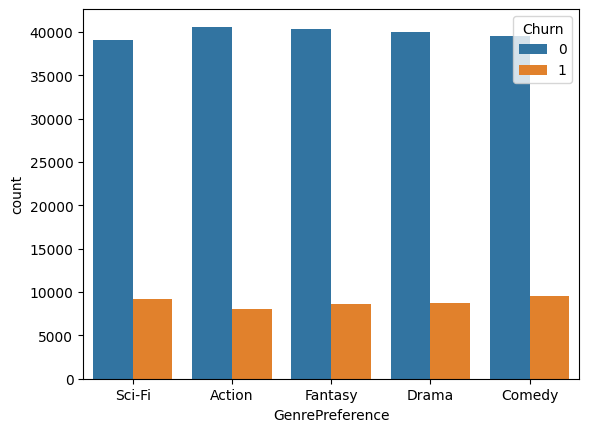

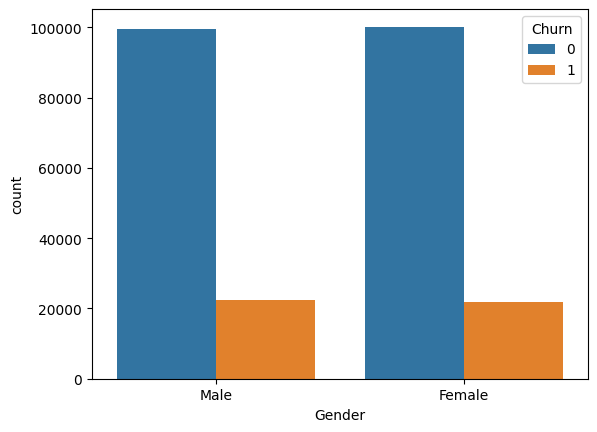

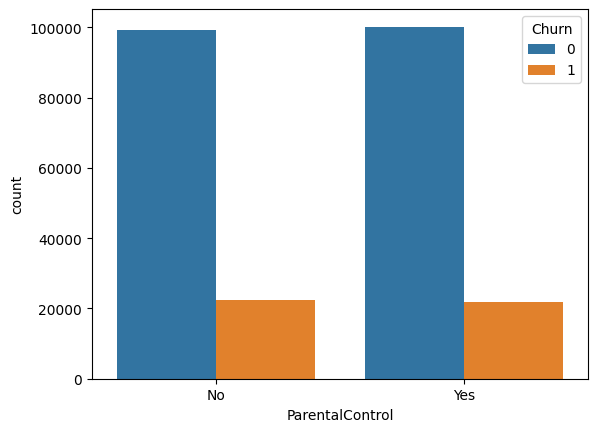

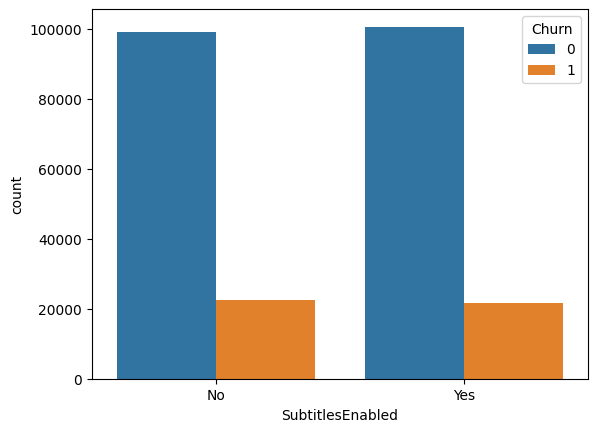

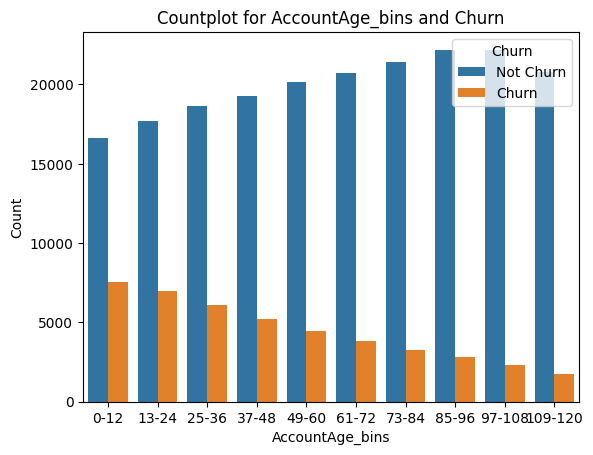

In [ ]:
import matplotlib.pyplot as plt
for i, predictor in enumerate(cat_df1.drop(columns = ['Churn'])):
   plt.figure()
   sns.countplot(data = cat_df1, x=predictor, hue ='Churn')

#Add Labels
plt.title(f'Countplot for {predictor} and Churn')
plt.xlabel(predictor)
plt.ylabel('Count')

#Add Legend
plt.legend(title='Churn', loc='upper right', labels = ['Not Churn', 'Churn'])

plt.show()



*   Lesser the AccountAge, higher the churners,however higher the AccountAge, less the churners



**Numerical Analysis**

In [ ]:
new_df.tail()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,0,73-84
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,0,109-120
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0,109-120
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,0,0-12
243786,90,11.593774,1043.439704,Premium,Mailed check,No,Both,No,TV,24.972537,...,11,Action,1.428896,3,Female,1,Yes,No,0,85-96


In [ ]:
new_df.Gender.value_counts()

Female    121930
Male      121857
Name: Gender, dtype: int64

In [ ]:
new_df1_target0 = new_df[new_df['Churn']=='0']
new_df1_target1 = new_df[new_df['Churn']=='1']


In [ ]:
new_df1_target0.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins


In [ ]:
new_df1_target1.Gender.value_counts()

Series([], Name: Gender, dtype: int64)

In [ ]:
# Assuming 'Churn' is the name of the column in your DataFrame 'new_df'
customers_notchurn_0 = new_df[new_df['Churn'] == 0]
customers_churn_1 = new_df[new_df['Churn'] == 1]


In [ ]:
customers_notchurn_0.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,0,13-24
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,0,49-60
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0,73-84
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,0,25-36
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,0,49-60


In [ ]:
customers_churn_1.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn,AccountAge_bins
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,1,25-36
20,55,9.058008,498.190456,Basic,Bank transfer,Yes,Movies,No,TV,25.497399,...,6,Fantasy,4.388684,0,Female,23,No,Yes,1,49-60
27,86,18.065236,1553.610263,Basic,Bank transfer,No,Movies,No,Mobile,1.100393,...,37,Sci-Fi,1.520874,5,Male,20,No,No,1,85-96
33,77,15.189883,1169.621014,Basic,Electronic check,No,Both,No,Tablet,21.259971,...,13,Drama,1.816507,5,Female,21,No,Yes,1,73-84
39,60,16.757798,1005.467866,Basic,Mailed check,No,Movies,No,Computer,29.638149,...,8,Sci-Fi,3.971063,2,Female,18,No,Yes,1,49-60


In [ ]:
customers_churn_1.Gender.value_counts()

Male      22435
Female    21747
Name: Gender, dtype: int64

In [ ]:
pd.crosstab(new_df.AccountAge_bins, new_df.Churn)

Churn,0,1
AccountAge_bins,,
0-12,16611,7518
13-24,17691,6966
25-36,18655,6118
37-48,19275,5229
49-60,20125,4454
61-72,20706,3837
73-84,21402,3246
85-96,22197,2781
97-108,22181,2301


In [ ]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,AccountAge_bins_0-12,AccountAge_bins_13-24,AccountAge_bins_25-36,AccountAge_bins_37-48,AccountAge_bins_49-60,AccountAge_bins_61-72,AccountAge_bins_73-84,AccountAge_bins_85-96,AccountAge_bins_97-108,AccountAge_bins_109-120
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,0,1,0,0,0,0,0,0,0,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,0,0,1,0,0,0,0,0
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0,0,0,0,0,0,1,0,0,0
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0,0,1,0,0,0,0,0,0,0
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,0,0,0,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

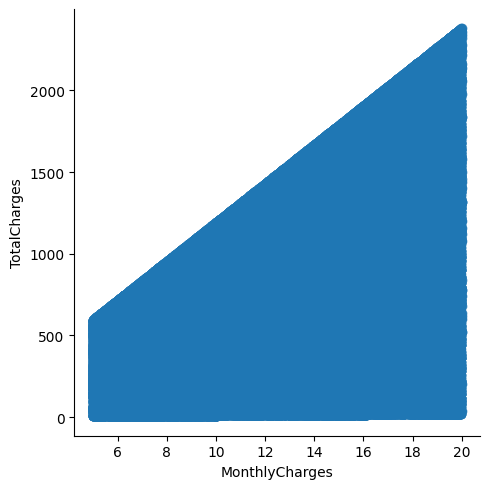

In [ ]:
sns.lmplot(data=new_df_dummies, x = 'MonthlyCharges', y= 'TotalCharges', fit_reg = False)

In [ ]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.498207455170243

<ipython-input-45-b3b104c899be>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)],
<ipython-input-45-b3b104c899be>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)],


Text(0, 0.5, 'MonthlyCharges by Churn')

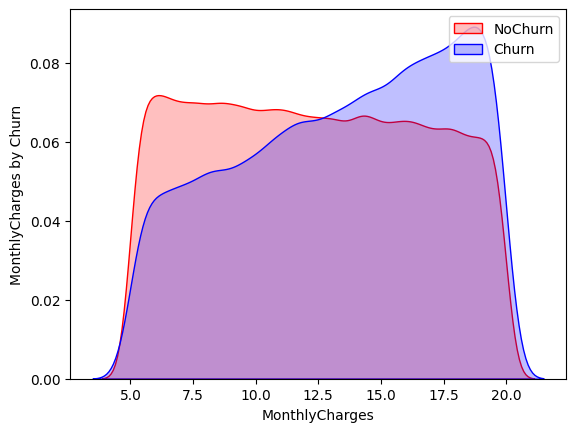

In [ ]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)],
                  color = 'Red', shade =True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)],
                 ax=Mth, color = 'blue', shade =True)
Mth.legend(['NoChurn', 'Churn'], loc ='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('MonthlyCharges')
Mth.set_ylabel('MonthlyCharges by Churn')

<ipython-input-46-20bd06297882>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==0)],
<ipython-input-46-20bd06297882>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)],


Text(0, 0.5, 'TotalCharges by Churn')

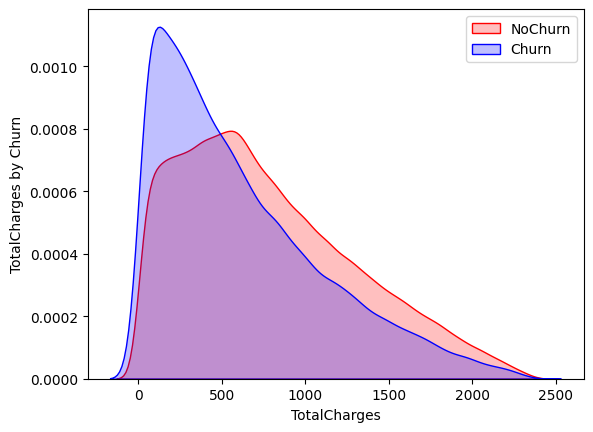

In [ ]:
Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==0)],
                  color = 'Red', shade =True)
Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)],
                 ax=Mth, color = 'blue', shade =True)
Mth.legend(['NoChurn', 'Churn'], loc ='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('TotalCharges')
Mth.set_ylabel('TotalCharges by Churn')



*   As MonthlyCharges increases, churned ratio increases
*   But for TotalCharges, lesser the total charges, more the churner



<ipython-input-47-e40f0b700b70>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.AccountAge[(new_df_dummies['Churn']==0)],
<ipython-input-47-e40f0b700b70>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.AccountAge[(new_df_dummies['Churn']==1)],


Text(0, 0.5, 'AccountAge by Churn')

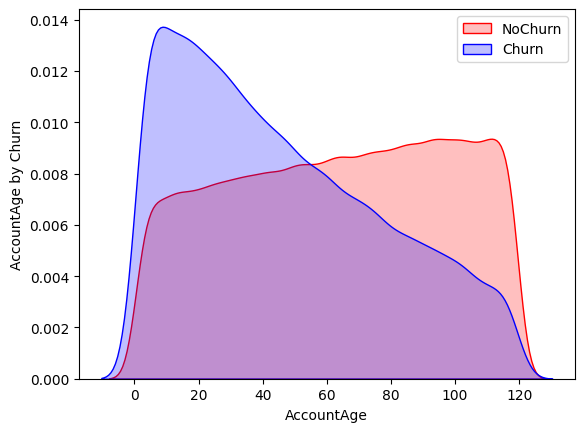

In [ ]:
Mth = sns.kdeplot(new_df_dummies.AccountAge[(new_df_dummies['Churn']==0)],
                  color = 'Red', shade =True)
Mth = sns.kdeplot(new_df_dummies.AccountAge[(new_df_dummies['Churn']==1)],
                 ax=Mth, color = 'blue', shade =True)
Mth.legend(['NoChurn', 'Churn'], loc ='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('AccountAge')
Mth.set_ylabel('AccountAge by Churn')

<ipython-input-48-cb929484dbc8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.SupportTicketsPerMonth[(new_df_dummies['Churn']==0)],
<ipython-input-48-cb929484dbc8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.SupportTicketsPerMonth[(new_df_dummies['Churn']==1)],


Text(0, 0.5, 'SupportTicketsPerMonth by Churn')

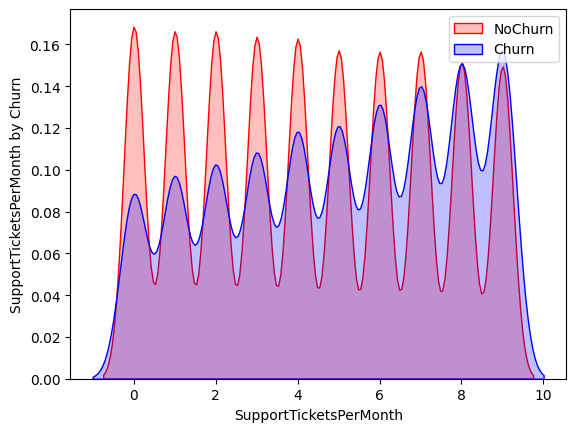

In [ ]:
Mth = sns.kdeplot(new_df_dummies.SupportTicketsPerMonth[(new_df_dummies['Churn']==0)],
                  color = 'Red', shade =True)
Mth = sns.kdeplot(new_df_dummies.SupportTicketsPerMonth[(new_df_dummies['Churn']==1)],
                 ax=Mth, color = 'blue', shade =True)
Mth.legend(['NoChurn', 'Churn'], loc ='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('SupportTicketsPerMonth')
Mth.set_ylabel('SupportTicketsPerMonth by Churn')

**Build a correlation of all the predictors with Churn **

<Axes: >

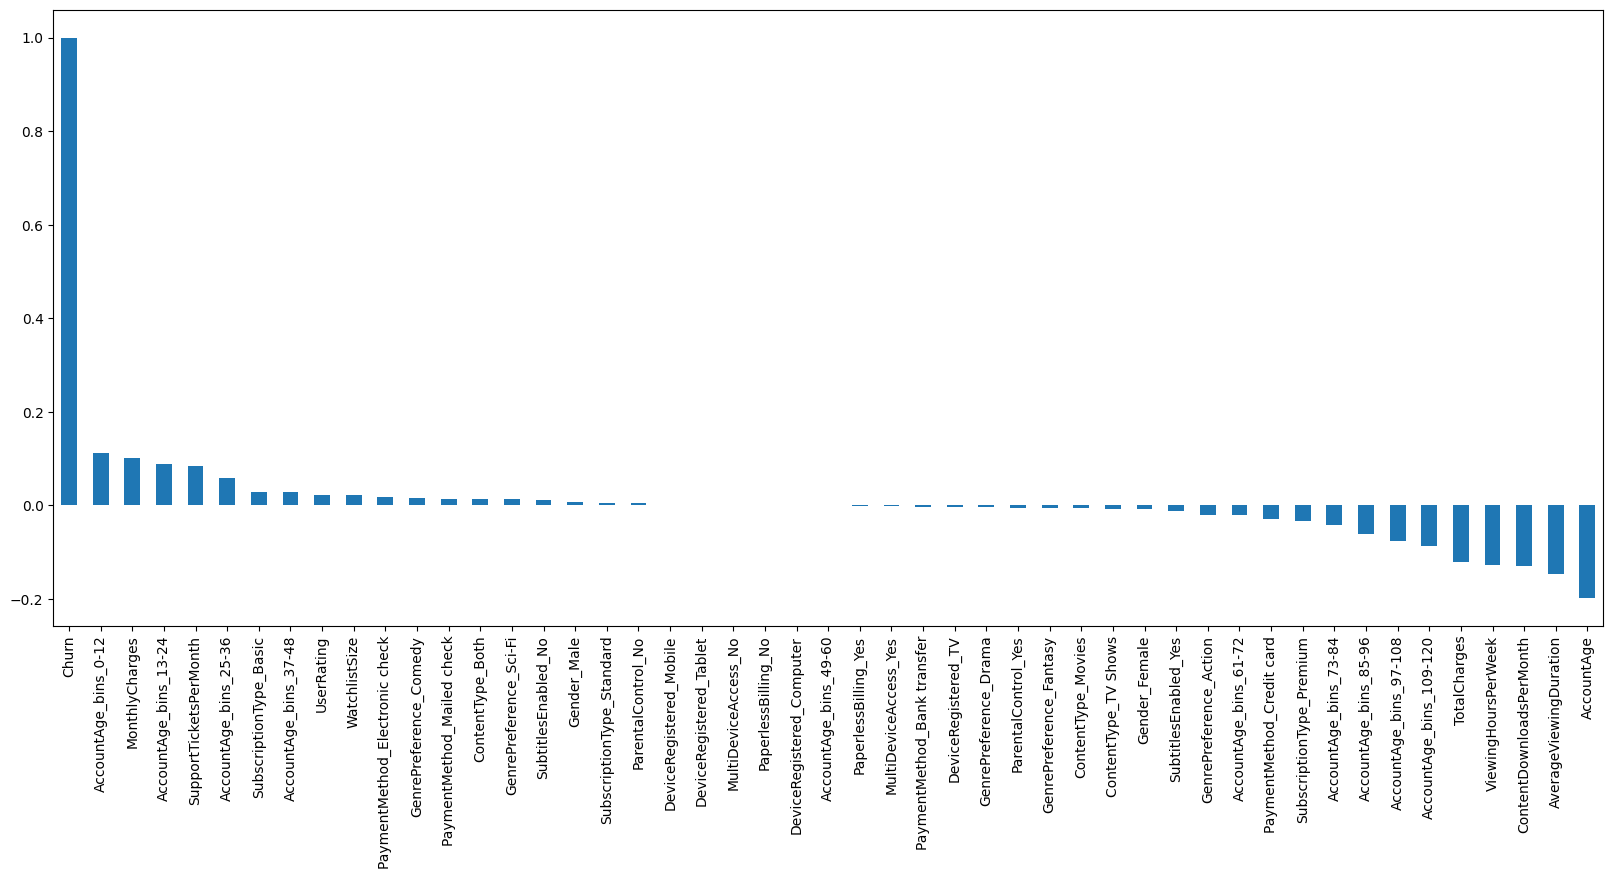

In [ ]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar')

** Derived Insights **

*   Factors like AccountAge_bin_0-12/13-24, lower monthly Charges and High Support tickets per month are the some factors which are seen in **High Churners**
*   **Low** Churn is seen in the case of ContentDownloadsPerMonth, TotalCharges, AverageViewingDuration, ViewingHoursPerWeek



**Bivariate Analysis**

In [ ]:
# Assuming 'Churn' is the name of the column in your DataFrame 'new_df'
customers_notchurn_0 = new_df[new_df['Churn'] == 0]
customers_churn_1 = new_df[new_df['Churn'] == 1]

In [ ]:
len(customers_notchurn_0)

199605

In [ ]:
len(customers_churn_1)

44182

In [ ]:
def uniplot(df,col,title, hue = None):

  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams['axes.labelsize'] = 20
  plt.rcParams['axes.titlesize'] = 22
  plt.rcParams['axes.titlepad'] = 30

  temp = pd.Series(data=hue)
  fig, ax = plt.subplots()
  width = len(df[col].unique())+ 7 + 4*len(temp.unique())
  fig.set_size_inches(width,8)
  plt.xticks(rotation = 45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data=df, x = col, order =df[col].value_counts().index, hue = hue, palette = 'bright')

<Figure size 200x100 with 0 Axes>

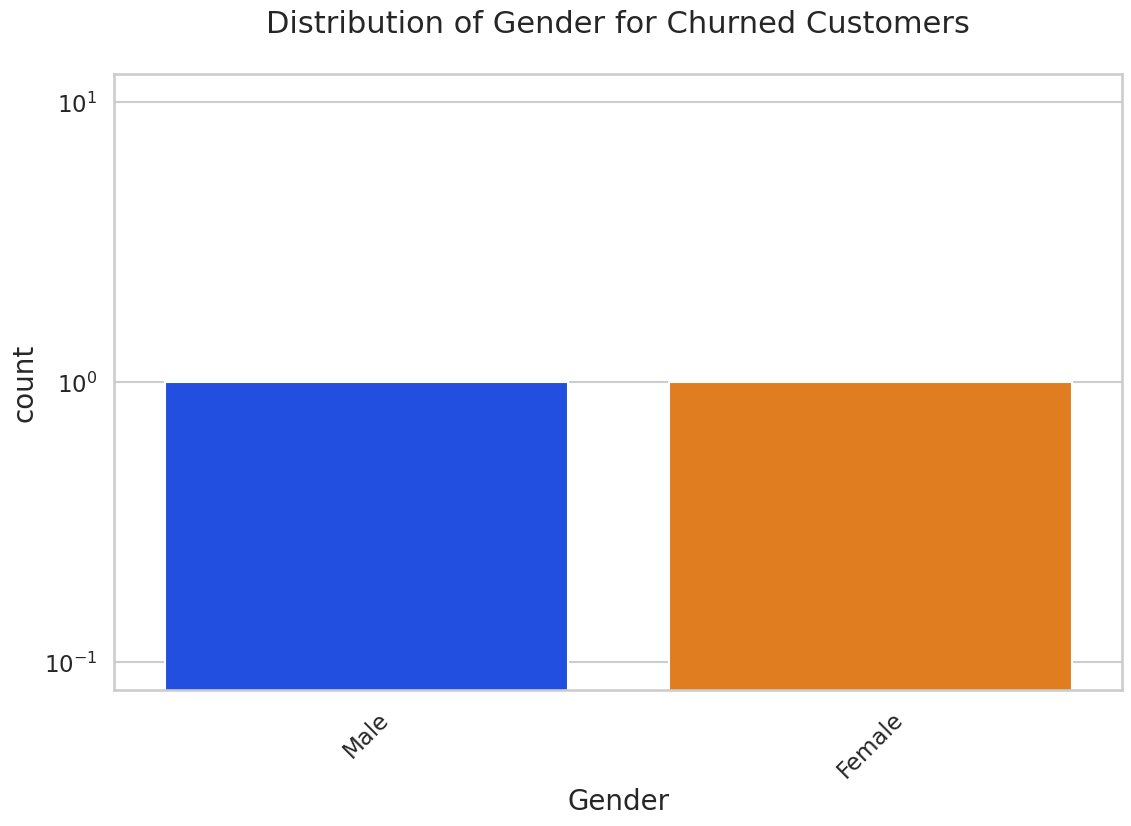

<Figure size 200x100 with 0 Axes>

In [ ]:
uniplot(customers_churn_1, col='Gender', title = 'Distribution of Gender for Churned Customers', hue = 'Gender')
plt.figure(figsize=(2, 1))  # Adjust the width and height as needed

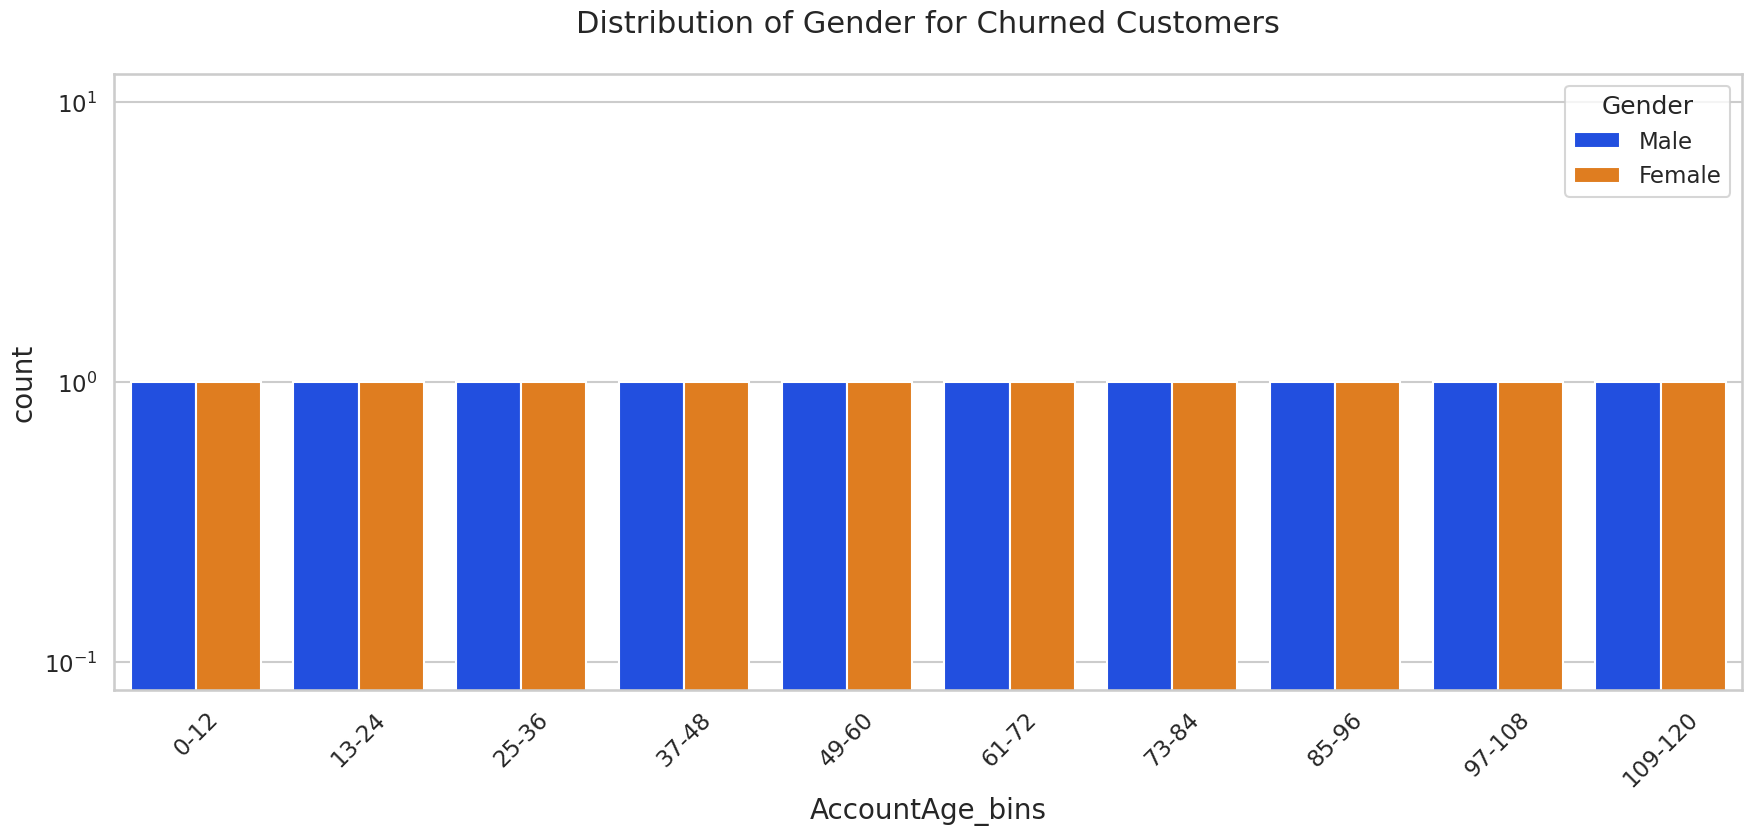

In [ ]:
uniplot(customers_churn_1, col='AccountAge_bins', title = 'Distribution of Gender for Churned Customers', hue = 'Gender')

**Conclusion**

*   Higher the **Montly charges**, higher the churner ratio
*   Churners are Higher if Total Charges are **Low**
*   Account Age upto **1 year** are higher **Churners**
*   As **Support Ticket Size increase**, Churner ratio increase

In [ ]:
new_df_dummies.head(20)

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,AccountAge_bins_0-12,AccountAge_bins_13-24,AccountAge_bins_25-36,AccountAge_bins_37-48,AccountAge_bins_49-60,AccountAge_bins_61-72,AccountAge_bins_73-84,AccountAge_bins_85-96,AccountAge_bins_97-108,AccountAge_bins_109-120
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,0,1,0,0,0,0,0,0,0,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,0,0,1,0,0,0,0,0
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0,0,0,0,0,0,1,0,0,0
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0,0,1,0,0,0,0,0,0,0
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,0,0,0,0,1,0,0,0,0,0
5,113,7.295744,824.419081,21.678290,97.095746,35,3.721134,8,2,0,...,0,0,0,0,0,0,0,0,0,1
6,38,12.340675,468.945639,36.512761,81.782993,28,4.090868,9,20,0,...,0,0,0,1,0,0,0,0,0,0
7,25,7.247550,181.188753,16.355816,154.521682,10,3.410221,2,22,0,...,0,0,1,0,0,0,0,0,0,0
8,26,19.803233,514.884050,8.202929,94.375211,28,2.679986,0,5,1,...,0,0,1,0,0,0,0,0,0,0
9,14,18.842934,263.801080,38.560694,122.012890,0,2.993441,0,18,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_df_dummies.to_csv('Streaming_Churn.csv')